# **CNN MNIST Handwritten Digits Recognition - Image Classification TensorFlow**

---

### About The Project

This project involves building a neural network in TensorFlow to classify handwritten digits from the MNIST dataset, focusing on data preprocessing, model architecture, training with the Adam optimizer, evaluation using accuracy and a confusion matrix, and saving the trained model for future inference.

### Data Overview

#### Data Shape:

- **Training Set**: 60,000 images
- **Test Set**: 10,000 images

#### Image Properties:

- **Resolution**: 28x28 pixels
- **Color**: Grayscale (1 channel)
- **Classes**: 10 (Digits from `0` to `9`)

This dataset consists of 70,000 images in total, with each image representing a handwritten digit from 0 to 9. Each image is in grayscale, and the pixel intensity values range from 0 (black) to 255 (white). The dataset is commonly used for training image classification models.


---

In [ ]:
# Importing necessary libraries

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Input,
    Dense,
    Flatten,
    Conv2D,
    MaxPooling2D,
    Dropout,
    BatchNormalization,
)

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)


### 1. Load and Prepare MNIST Data


In [4]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


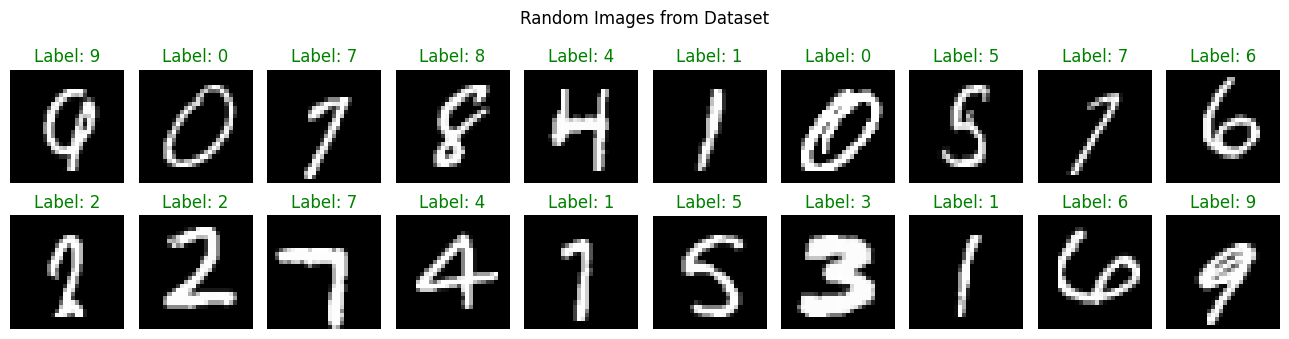

In [ ]:
def plot_random_images(x_data, y_data, rows=2, cols=10, cmap="gray"):
    plt.figure(figsize=(cols * 1.3, rows * 1.8))
    plt.suptitle("Random Images from Dataset")
    len_data = len(x_data)

    for i in range(1, rows * cols + 1):
        plt.subplot(rows, cols, i)
        random_idx = np.random.randint(0, len_data)
        plt.imshow(x_data[random_idx], cmap=cmap)
        plt.title(f"Label: {y_data[random_idx]}", color="green")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


plot_random_images(x_train, y_train)

In [11]:
# Reshape and normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Print dataset information
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28, 1)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28, 1)
Test labels shape: (10000,)


### 2. Data Augmentation

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(
    rotation_range=15,  # Increased from 10 to 15 degrees
    zoom_range=0.15,  # Slightly more aggressive zoom
    width_shift_range=0.15,  # Increased shift range
    height_shift_range=0.15,
    shear_range=0.1,  # Added shear transformation
    fill_mode="nearest",  # Strategy for filling in newly created pixels
)

# # Validation data should not be augmented, only normalized
# val_datagen = ImageDataGenerator()

In [14]:
# Create data generators
batch_size = 128
train_generator = train_datagen.flow(
    x_train, y_train, batch_size=batch_size, shuffle=True
)

# val_generator = val_datagen.flow(x_test, y_test, batch_size=batch_size, shuffle=False)

### 3. Visualize Augmented Data

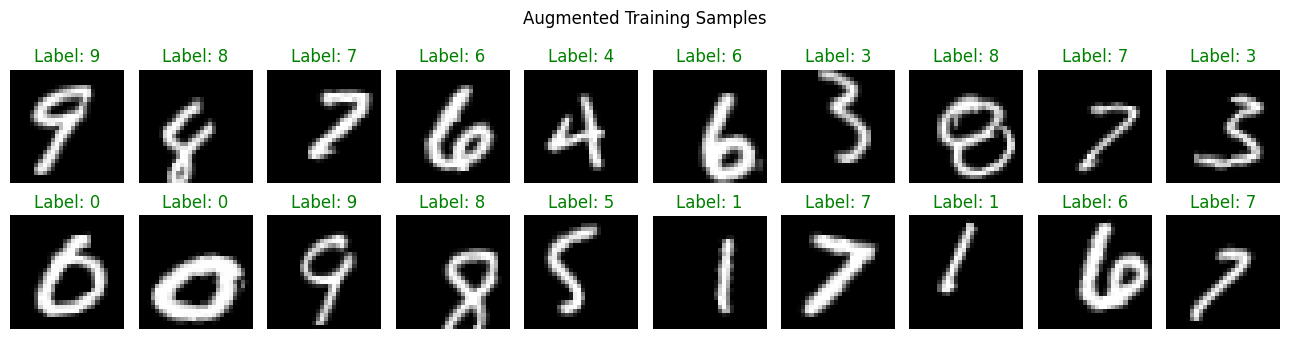

In [ ]:
def plot_augmented_samples(generator, rows=2, cols=10, cmap="gray"):
    """rows * cols must be less than or equal to the number of augmented samples (batch_size)."""
    x_batch, y_batch = next(generator)
    plt.figure(figsize=(cols * 1.3, rows * 1.8))
    plt.suptitle("Augmented Training Samples")

    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(x_batch[i].squeeze(), cmap=cmap)
        plt.title(f"Label: {y_batch[i]}", color="green")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


plot_augmented_samples(train_generator)

### 4. Build Enhanced CNN Model

In [ ]:
def build_model():
    model = Sequential(
        [
            Input(shape=(28, 28, 1)),
            # First Conv Block
            Conv2D(32, (3, 3), activation="relu", padding="same"),
            BatchNormalization(),
            Conv2D(32, (3, 3), activation="relu", padding="same"),
            BatchNormalization(),
            MaxPooling2D((2, 2)),
            Dropout(0.25),
            # Second Conv Block
            Conv2D(64, (3, 3), activation="relu", padding="same"),
            BatchNormalization(),
            Conv2D(64, (3, 3), activation="relu", padding="same"),
            BatchNormalization(),
            MaxPooling2D((2, 2)),
            Dropout(0.25),
            # Classifier
            Flatten(),
            Dense(256, activation="relu"),
            BatchNormalization(),
            Dropout(0.5),
            Dense(10, activation="softmax"),
        ]
    )

    return model


model = build_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 872,426 (3.33 MB)

 Trainable params: 871,530 (3.32 MB)

 Non-trainable params: 896 (3.50 KB)

### 5. Compile with Custom Optimizer

In [18]:
initial_learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)

model.compile(
    optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

### 6. Add Callbacks


In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [20]:
callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, min_lr=1e-6),
]

### 7. Train the Model

In [21]:
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=(x_test, y_test),
    epochs=epochs,
    callbacks=callbacks,
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 64ms/step - accuracy: 0.7208 - loss: 0.9432 - val_accuracy: 0.1146 - val_loss: 6.0861 - learning_rate: 0.0010
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - accuracy: 0.9477 - loss: 0.1723 - val_accuracy: 0.9728 - val_loss: 0.0891 - learning_rate: 0.0010
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.9650 - loss: 0.1203 - val_accuracy: 0.9806 - val_loss: 0.0547 - learning_rate: 0.0010
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.9706 - loss: 0.0937 - val_accuracy: 0.9820 - val_loss: 0.0603 - learning_rate: 0.0010
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.9746 - loss: 0.0846 - val_accuracy: 0.9885 - val_loss: 0.0371 - learning_rate: 0.0010
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.9756 - loss: 0.0796 - val_accuracy: 0.9006 - val_loss: 0.2822 - learning_rate: 0.0010
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.9773 - loss: 0.0732

### 8. Evaluate the Model

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nFinal Test Accuracy: {test_acc:.4f}")
print(f"Final Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9898 - loss: 0.0327

Final Test Accuracy: 0.9915
Final Test Loss: 0.0260


### 9. Plot Training History

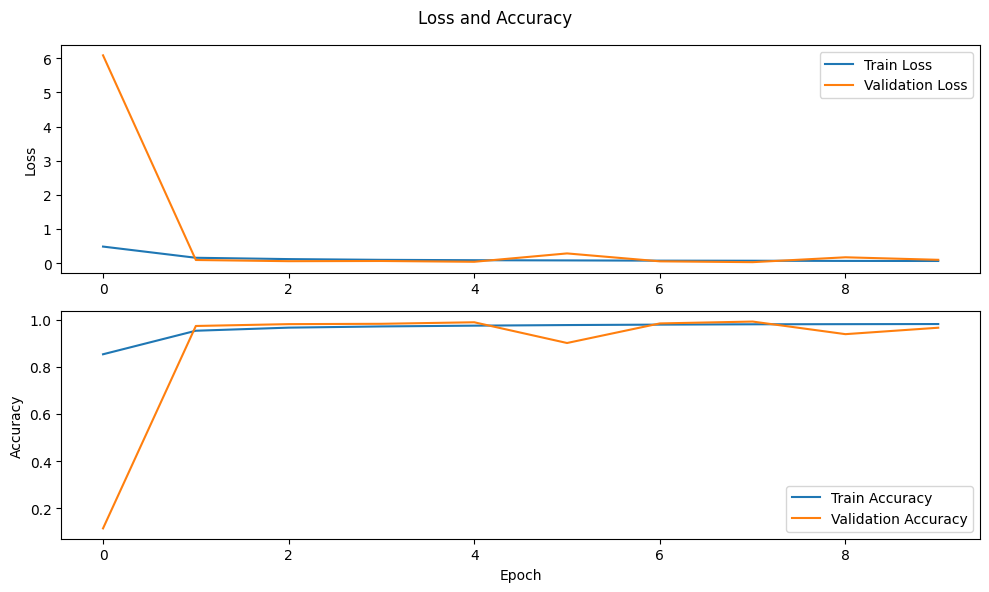

In [ ]:
def plot_training_history(history):
    plt.figure(figsize=(10, 6))
    plt.suptitle("Loss and Accuracy")

    # Loss plot
    plt.subplot(2, 1, 1)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.ylabel("Loss")
    plt.legend()

    # Accuracy plot
    plt.subplot(2, 1, 2)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.xlabel("Epoch")
    plt.tight_layout()
    plt.show()


plot_training_history(history)

### 10. Visualize Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


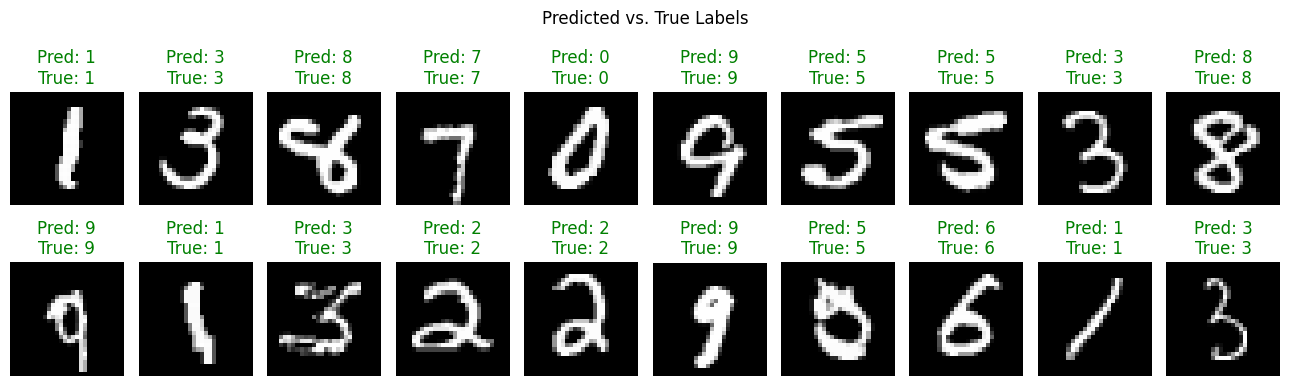

In [ ]:
def visualize_predictions(model, x_test, y_test, rows=2, cols=10, cmap="gray"):
    sample_indices = np.random.choice(len(x_test), size=rows * cols, replace=False)
    images = x_test[sample_indices]
    true_labels = y_test[sample_indices]

    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    plt.figure(figsize=(cols * 1.3, rows * 2.1))
    plt.suptitle("Predicted vs. True Labels")
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].squeeze(), cmap=cmap)
        color = "green" if predicted_labels[i] == true_labels[i] else "red"
        plt.title(f"Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}", color=color)
        plt.axis("off")
    plt.tight_layout()
    plt.show()


visualize_predictions(model, x_test, y_test)

### 11. Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


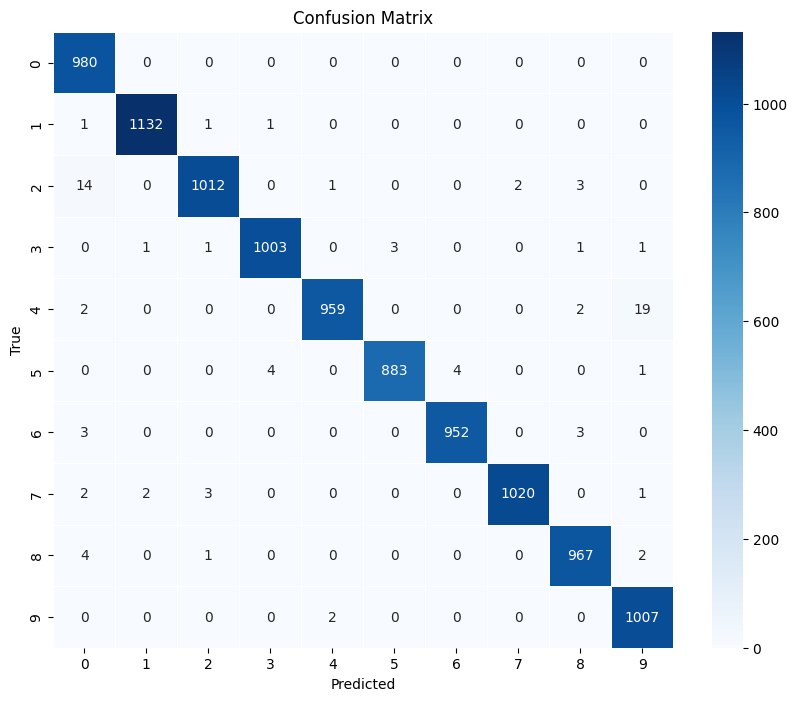

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


def plot_confusion_matrix(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    cm = confusion_matrix(y_test, y_pred_classes)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()


plot_confusion_matrix(model, x_test, y_test)

### 12. Save the Model

In [51]:
# Save Full Model
model.save("mnist_cnn_model.keras")
print("Full model saved.")

Full model saved.


In [52]:
# Save Weights Only
model.save_weights("mnist_cnn.weights.h5")
print("Weights saved.")

Weights saved.


### 13. Load the Model

In [53]:
from tensorflow.keras.models import load_model

In [54]:
# Option 1: Load full model
mnist_model_1 = load_model("mnist_cnn_model.keras")
print("Full model loaded.")

Full model loaded.


In [55]:
# Option 2: Load only weights
mnist_model_2 = build_model()
mnist_model_2.load_weights("mnist_cnn.weights.h5")
print("Weights loaded into model.")

Weights loaded into model.


In [56]:
# Make the prediction:
predictions = mnist_model_1.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
